In [16]:
import pandas as pd
import numpy as np
from faker import Faker
import random
import matplotlib.pyplot as plt
import seaborn as sns   

In [2]:
# 1. Synthetic sales_data.csv
def generate_sales_data(num_records=1000):
    fake = Faker()
    Faker.seed(0)
    
    product_ids = [f"P{i:03d}" for i in range(1, 21)]  # 20 product IDs
    customer_ids = [f"C{i:03d}" for i in range(1, 51)]  # 50 customer IDs
    
    data = {
        "order_id": [],
        "order_date": [],
        "product_id": [],
        "quantity": [],
        "price": [],
        "customer_id": []
    }
    
    for i in range(num_records):
        data["order_id"].append(i+1)
        data["order_date"].append(fake.date_between(start_date="-2y", end_date="today"))
        data["product_id"].append(random.choice(product_ids))
        data["quantity"].append(random.randint(1, 10))
        data["price"].append(round(random.uniform(5, 200), 2))
        data["customer_id"].append(random.choice(customer_ids))
    
    df = pd.DataFrame(data)
    # Sort by date if desired
    df.sort_values("order_date", inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [3]:
# Example usage:
sales_df = generate_sales_data(num_records=1000)
sales_df.to_csv("data/sales_data.csv", index=False)

In [1]:
# 2. Join data
def generate_user_data(num_users=100):
    fake = Faker()
    Faker.seed(0)
    
    # Possible categories
    genders = ["Male", "Female", "Non-Binary"]
    countries = ["USA", "Canada", "UK", "Germany", "France", "Australia"]
    
    demo_data = {
        "user_id": [],
        "age": [],
        "gender": [],
        "country": []
    }
    
    for i in range(num_users):
        user_id = f"U{i+1:04d}"
        demo_data["user_id"].append(user_id)
        demo_data["age"].append(random.randint(18, 70))
        demo_data["gender"].append(random.choice(genders))
        demo_data["country"].append(random.choice(countries))
    
    user_demographics_df = pd.DataFrame(demo_data)
    
    # Generate interactions (potentially more than one per user)
    interaction_types = ["view", "click", "purchase"]
    num_records = num_users * 5  # average 5 interactions per user
    interaction_data = {
        "user_id": [],
        "interaction_type": [],
        "item_id": [],
        "timestamp": []
    }
    
    for _ in range(num_records):
        user_id = random.choice(demo_data["user_id"])
        interaction_data["user_id"].append(user_id)
        interaction_data["interaction_type"].append(random.choice(interaction_types))
        interaction_data["item_id"].append(f"Item_{random.randint(1, 50)}")
        interaction_data["timestamp"].append(fake.date_time_between(start_date="-1y", end_date="now"))
    
    user_interactions_df = pd.DataFrame(interaction_data)
    # Sort by timestamp
    user_interactions_df.sort_values("timestamp", inplace=True)
    user_interactions_df.reset_index(drop=True, inplace=True)
    
    return user_interactions_df, user_demographics_df

In [4]:
ui_df, ud_df = generate_user_data(num_users=100)
ui_df.to_csv("data/user_interactions.csv", index=False)
ud_df.to_csv("data/user_demographics.csv", index=False)

In [5]:
# 3. Synthetic Housing Data

def generate_housing_data(num_records=200, missing_rate=0.1):
    locations = ["Downtown", "Suburbs", "Countryside", "Beachside"]
    
    data = {
        "house_id": [],
        "num_rooms": [],
        "num_bathrooms": [],
        "square_feet": [],
        "location": [],
        "price": []
    }
    
    for i in range(num_records):
        data["house_id"].append(f"H{i+1:04d}")
        
        # Some values may be missing
        if random.random() < missing_rate:
            num_rooms = None
        else:
            num_rooms = random.uniform(1, 5)  # could be 1.0, 2.5, etc.
        data["num_rooms"].append(num_rooms)
        
        if random.random() < missing_rate:
            num_bathrooms = None
        else:
            num_bathrooms = random.uniform(1, 3)
        data["num_bathrooms"].append(num_bathrooms)
        
        data["square_feet"].append(random.randint(600, 4000))
        data["location"].append(random.choice(locations))
        data["price"].append(random.uniform(100000, 1000000))  # from 100k to 1M
    
    df = pd.DataFrame(data)
    return df

In [7]:
houses_df = generate_housing_data(num_records=1000)
houses_df.to_csv("data/houses.csv", index=False)

In [9]:
# 4. Synthetic Stock Data
def generate_stock_data(num_days=200):
    fake = Faker()
    Faker.seed(0)
    
    tickers = ["AAPL", "MSFT", "GOOG", "TSLA", "AMZN"]
    
    dates = pd.date_range(start="2023-01-01", periods=num_days, freq="D")
    data = {
        "date": [],
        "ticker": [],
        "close_price": []
    }
    
    for ticker in tickers:
        price = random.uniform(100, 300)  # starting price
        for d in dates:
            # simulate day-to-day price changes
            price *= random.uniform(0.98, 1.02)  
            data["date"].append(d)
            data["ticker"].append(ticker)
            data["close_price"].append(round(price, 2))
    
    df = pd.DataFrame(data)
    df.sort_values(["ticker", "date"], inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [10]:
stock_df = generate_stock_data(num_days=1000)
stock_df.to_csv("data/stock_prices.csv", index=False)

In [31]:
# 5. Synthetic Product Data
import pandas as pd
import numpy as np
import random

def generate_bank_customers(num_records=1000, seed=731):
    random.seed(seed)
    np.random.seed(seed)
    
    data = {
        "customer_id": [],
        "age": [],
        "salary": [],
        "num_of_products": [],
        "is_active_member": [],
        "churn": []
    }
    
    for i in range(num_records):
        # More complex age generation
        age = int(np.random.normal(40, 15))  # Normal distribution
        age = max(18, min(age, 70))  # Clip to 18-70 range
        
        # Salary with more variance
        base_salary = 50000
        salary_variance = np.random.normal(0, 30000)
        salary = round(base_salary + salary_variance, 2)
        salary = max(20000, min(salary, 500000))
        
        # Products with correlation
        num_products = max(1, min(int(np.random.poisson(2)), 4))
        
        # Active member with some randomness
        is_active = random.choices([0, 1], weights=[0.3, 0.7])[0]
        
        # More complex churn probability
        # Use multiple independent factors with randomness
        churn_factors = [
            # Age impact (non-linear)
            max(0, np.sin(age/10) * 0.3),
            
            # Salary impact (log-transformed for non-linearity)
            max(0, 0.2 * (1 - np.log(salary)/np.log(100000))),
                        
            # Random noise with higher variance
            random.gauss(0, 0.2)
        ]
        
        # Combine factors with some randomness
        churn_prob = sum(churn_factors)
        
        # Ensure probability is between 0 and 1
        churn_prob = max(0, min(churn_prob, 1))
        
        # Add some extreme cases for more variability
        if random.random() < 0.05:  # 5% chance of unexpected churn
            churn_prob = random.random()
        
        # Generate data
        data["customer_id"].append(f"BC{i+1:05d}")
        data["age"].append(age)
        data["salary"].append(salary)
        data["num_of_products"].append(num_products)
        data["is_active_member"].append(is_active)
        data["churn"].append(1 if random.random() < churn_prob else 0)
    
    df = pd.DataFrame(data)
    
    return df

In [32]:
bank_df = generate_bank_customers(num_records=1000)
bank_df.to_csv("data/bank_customers.csv", index=False)

Churn Rate: 0.137


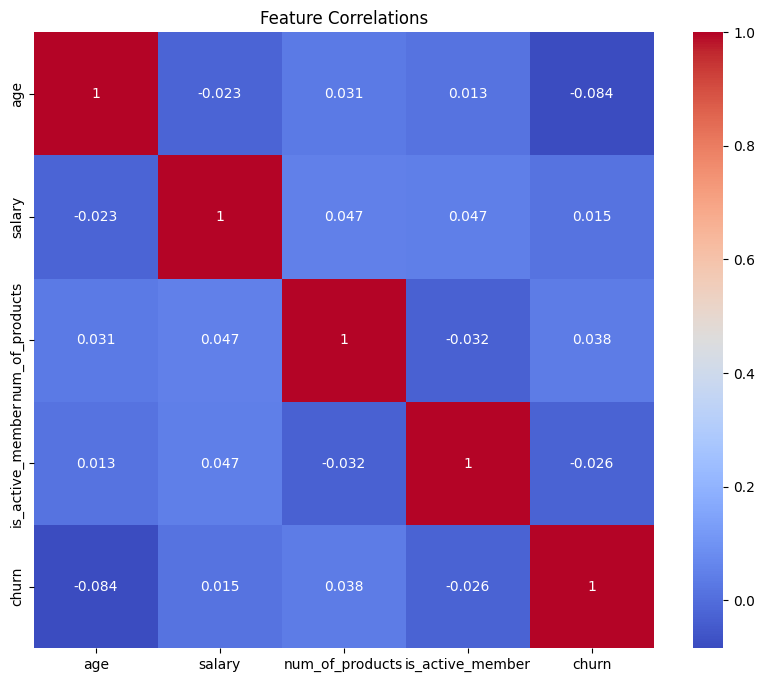

In [33]:
# Churn rate analysis
print("Churn Rate:", bank_df['churn'].mean())

# Correlation visualization
plt.figure(figsize=(10, 8))
sns.heatmap(bank_df.drop(["customer_id"], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()